# Sarah Spence -HW3

In [46]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import confusion_matrix

import common_helpers as common
from data_processing import FDR_feature_ranking as FDR
from machine_learning import k_fold_validation as k_fold
from machine_learning import parzen_window

In [47]:
# Create pandas df of data
iris_df = pd.read_csv("data_files/iris.csv")
num_df = pd.read_csv("data_files/num_feature_data.csv")

num_labels, num_data = common.split_labels(num_df, "label")
num_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,468.855453,-552.065881,337.223816,126.880671,-470.425603,-55.041282,-90.974070,183.514488,-187.854802,-300.162747,...,-258.586048,458.806539,-28.493189,233.454588,-2.355679,218.625550,-194.306225,46.375335,150.182147,5
1,373.215280,-299.199199,-187.662856,33.215401,-85.679046,133.169926,62.867492,117.948097,-167.152117,-131.101057,...,24.111983,27.505042,-33.605422,106.798956,-48.448041,17.953191,-37.977350,25.418885,-68.129792,1
2,44.560580,179.591415,-1.046384,-107.752514,-170.749118,72.464769,74.061609,159.747231,75.254319,-97.956961,...,-42.669870,53.745902,63.915683,16.053819,204.148576,21.313014,112.089917,174.298505,83.222237,7
3,-426.763125,113.667565,631.382424,90.131702,-345.365140,-121.420926,259.603702,-118.877930,-381.082618,-149.391089,...,278.121620,307.463746,-320.682177,25.949240,-119.724524,-112.892939,31.320803,227.806923,5.100143,6
4,156.405181,-190.441356,624.006505,-70.424811,-485.922333,-0.897599,338.995696,-240.117163,-233.726128,-155.714942,...,15.672108,72.272718,13.703888,-41.768028,-136.457062,62.560508,-56.500202,126.529231,-63.724793,6


## Problem 1 - Module 4 and 5 This is NOT a Collaborative Problem
(20 Points Total)

In this problem use the developed numerical features from HW2. In this problem the following is to be completed:

Use the Fisher’s Linear Discriminant Ratio (FDR) from the Data Processing document, specifically Equation 20.

### (a) (10 points) For each feature and combination of numbers apply the FDR, e.g., 0 vs 1, 0 vs 2, ..., 0 vs 9, ..., 7 vs 8, 7 vs 9, and 8 vs 9.

In [48]:
# See the algoriths for FDR feature ranking in data_processing/FDR_feature_ranking.py
FDR_table, FDR_df, feature_ranks = FDR.FDR_two_class_feature_ranking(num_df, [i for i in range(10)], "label", "sum")

### (b) (10 points) Place the results in a table and provide an initial analysis of which feature provides the best class separation.

In [49]:
# NOTE: Export table to csv file
FDR_df.to_csv("data_files/HW3_FDR_Table.csv", index=False)
FDR_table

,class combinations,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,0 vs. 1,2.909873,0.012316,0.469406,0.007802,1.626339,0.026436,0.078876,0.107853,0.002561,0.037614,0.002740,0.231293,0.310360,0.005303,0.090879,0.007415,0.008519,0.145404,0.008508,0.001156,15.460244,0.043862,0.266137,0.003481,0.041641,0.089984,0.218267,0.114965,0.195525,0.014296,0.258702,0.063900,0.060231,0.057411,0.005522,0.004533,0.160776,0.151834,0.001659,0.000261,1.185099,0.003472,1.876629,1.221188,0.306612,1.020963,0.237040,0.250319,0.054663,0.001072,0.283681,0.003893,0.000046,0.004392,0.031881,0.002055,0.144830,0.042532,0.030257,0.029588
1,0 vs. 2,4.585414,0.071634,0.364998,0.001091,0.900921,0.266366,0.041572,0.023042,0.023855,0.041580,0.095286,0.307723,0.078883,0.014898,0.007179,0.011881,0.028765,0.000051,0.049099,0.014037,2.457070,0.171495,0.082082,0.529960,0.005044,0.227184,0.038704,0.014612,0.000952,0.000542,0.020176,0.009963,0.003355,0.290022,0.000239,0.051249,0.057424,0.050334,0.000000,0.009912,0.088699,0.957467,1.359535,0.019732,0.214044,0.230257,0.045919,0.209809,0.000422,0.029304,0.303786,0.000005,0.012812,0.089420,0.000052,0.138552,0.006751,0.067220,0.156284,0.031909
2,0 vs. 3,0.841640,0.144057,2.923781,0.361144,1.610313,0.011188,0.578361,0.063808,0.052008,0.084509,0.413546,0.003804,0.014428,0.007804,0.000891,0.027166,0.007219,0.002505,0.005103,0.044669,5.226111,0.220587,0.118632,1.210720,0.280172,0.293900,0.108815,0.008654,0.005653,0.087606,0.002341,0.175800,0.005197,0.213283,0.095529,0.071290,0.000318,0.005249,0.003120,0.000640,0.131262,0.648282,1.621361,0.421306,0.000749,0.069707,0.021799,0.363055,0.038603,0.033677,0.002236,0.150384,0.000803,0.066058,0.034711,0.147986,0.065361,0.004444,0.220204,0.007876
3,0 vs. 4,3.118047,0.098607,0.352253,0.058227,2.540865,0.028179,0.174589,0.578880,0.024295,0.042468,0.001398,0.224029,0.016436,0.004268,0.057716,0.069587,0.001614,0.000629,0.001006,0.004033,0.667160,0.683031,0.686573,0.079918,0.000031,0.031860,0.212091,0.220673,0.034702,0.332239,0.000297,0.117447,0.003866,0.005146,0.161547,0.001427,0.014739,0.000116,0.000726,0.002812,4.698362,0.026401,3.556281,0.460419,0.143091,0.017805,0.000046,0.109585,0.003586,0.004603,0.009477,0.003816,0.030493,0.097744,0.029140,0.052364,0.041887,0.047443,0.049890,0.028823
4,0 vs. 5,0.489061,0.000179,0.159667,0.027219,1.477845,0.172944,0.127323,0.675905,0.003501,0.309608,0.090032,0.091272,0.066808,0.035657,0.168655,0.002758,0.000304,0.011859,0.003284,0.007249,3.496662,0.496715,0.000001,0.055111,0.266042,0.012266,0.008692,0.133219,0.003217,0.090021,0.004421,0.161557,0.032229,0.062216,0.151375,0.004068,0.037957,0.012878,0.010227,0.001942,0.053472,0.266359,0.282670,0.388426,0.044812,0.269122,0.030889,0.118859,0.000391,0.001156,0.094331,0.072633,0.025580,0.177847,0.095031,0.049056,0.008190,0.001004,0.004061,0.013782
5,0 vs. 6,0.914303,0.021949,0.703241,0.018365,2.895442,0.477346,0.344715,0.325241,0.011905,0.111791,0.082167,0.000008,0.011888,0.003679,0.010491,0.011205,0.000463,0.008327,0.001192,0.106667,2.331437,0.486196,0.101571,0.477977,0.029241,0.013110,0.480007,0.009575,0.065826,0.146262,0.052343,0.074576,0.018060,0.000127,0.012439,0.003758,0.109810,0.000276,0.003289,0.039071,1.141075,2.325427,1.865695,0.570554,0.123258,0.033532,1.132492,0.244884,0.008486,0.003247,0.243335,0.165280,0.012558,0.002302,0.023168,0.000697,0.050772,0.007139,0.052033,0.016836
6,0 vs. 7,1.810155,0.426564,0.146350,0.958998,0.344478,0.007995,1.024622,0.619198,0.097988,0.020132,0.002041,0.256321,0.114199,0.033279,0.005556,0.000768,0.000461,0.049649,0.064320,0.104831,2.684793,1.024646,1.028685,0.130522,0.023818,0.230046,0.330398,0.070851,0.002943,0.042411,0.008242,0.123459,0.008409,0.012512,0.070057,0.015381,0.058831,0.001269,0.001002,0.050367,4.412228,0.799256,0.137721,0.015675,0.571028,0.269554,0.564566,0.073553,0.004312,0.072268,0.023483,0.263437,0.001576,0.102650,0.011011,0.16

In [50]:
# The call to get FDR table and ranking above used the sum method.
# See data_processing/FDR_feature_ranking.py to see the other options
# the algorithm accepts. 
print(f"The ranked features are:\n{feature_ranks}")

The ranked features are:
['41', '40', '20', '2', '0', '42', '7', '22', '4', '21', '44', '46', '43', '6', '3', '45', '11', '23', '47', '51', '50', '12', '29', '10', '5', '1', '30', '26', '27', '25', '24', '53', '9', '33', '31', '58', '28', '55', '36', '54', '34', '48', '19', '49', '18', '52', '56', '37', '8', '14', '59', '17', '35', '13', '39', '32', '16', '15', '57', '38']


The analysis showed that feature 41 provided the best class separation of the 60 features. This analysis calculated the sum of Fisher's Discriminant Ratios for every feature as the ranking approach. This ranking approach is not always accurate because a feature could have strong separability between two classes and weaker separability among the other classes. The table supports that feature 41 separates multiple classes. For example, feature 41 had high FDR values for the following classes, UPDATE:: 0 vs. 4, 0 vs. 7, 1 vs. 4, 3 vs. 4, and 3 vs. 7.   

## Problem 2 - Module 7 - Chapter 1 and 2 [8] Note this is NOT a Collaborative Problem

(10 Points Total)

### Define in your own words the following terms:

#### (a) agent

An agent is anything consisting of sensors to perceive an environment and actuators to act on the environment.

#### (b) agent function

An agent function is a mathematical representation of an agent's decision process. 

#### (c) agent program

An agent program is an implementation of the agent function that can run in an environment.

#### (d) artificial intelligence

Artificial intelligence is a field of study interested in understanding intelligence and producing intelligent machines. 

#### (e) autonomy

Autonomy describes a program that can learn new aspects of its environment and adjust decisions based on what it has learned.

#### (f) goal-based agent

A goal-based agent makes decisions that work toward a clearly defined goal or desired state.

#### (g) intelligence

Intelligence is the ability to learn new things. A computer program is considered intelligence when it can learn to perform actions without hard-coded instructions. 

#### (h) learning agent

Learning agents can operate without background knowledge about their environment. These agents learn the characteristics of their environment through experience. Learning agents consist of two components. The learning component makes training improvements, and the performance component selects actions. In other words, the learning element optimizes the performance element throughout iterations.  

#### (i) logical reasoning

Logical reasoning is the process of developing a conclusion based on known characteristics or pre-existing knowledge of a partially unknown state. 

#### (j) model-based agent

Model-based agents store previous knowledge about the environment's state in internal models. These internal models represent how the world changes over time and how the agent perceives the environment. Model-based agents use the previously stored states to make decisions using abstracted aspects of the current state. 

#### (k) rationality

Rationality is the concept of doing the right thing. A rational agent selects actions to maximize its performance measure using prior knowledge of the environment and what it perceives of the current state. 

#### (l) reflex agent

Reflex agents make decisions based on aspects of the currently observable state only. Reflex agents are the simplest forms of agents. Most real-world examples are too complex for reflex agents alone. 

#### (m) utility-based agent

Utility-based agents use a utility function to measure the trade-offs between multiple goals or desired states. For example, if the agent were racing a car, it would measure the trade-offs between winning the race and keeping the car in one piece. 

## Problem 3 - Module 6 - Section 5.3.1 Cross-Validation [7] This is a Collaborative Problem

(20 Points Total)

In this problem you are to develop and implement a k-fold cross validation algorithm. You are allowed to use either the Iris data set or the developed numerical features from HW2 to test your implementation. In this problem the following is to be completed:

### (a) (5 points) Develop (pseudocode) an algorithm to randomly shuffle input data. Then divide the data into groups of testing and training sets based on the number of desired folds/experiments, the term used will be k-fold cross validation. Use the 5-fold cross validation in Figure 1 as a reference.

![image](./data_files/images/Figure_4.jpg) 


Pseudocode:

SHUFFLE_DATA(df):

    1. return shuffled data                                                 
       cost: c1    time: n

Worst Case T(n): c1(n)

O-notation: O(n)

GET_FOLDS(num_data, num_folds):

    1. if num_data is not divisble by num_folds:                               
       cost: c1   time: 1
    
        return error
        
    2. else if num_folds is 1:                                                 
       cost: c2   time: 1
    
        return error
        
    else:
    
       3. indices <- create list of 0-num_data index values                
          cost:c3    time: n
        
       4. partition_size <- num_data divided by num_folds                      
          cost: c4   time: 1
        
       5. k_folds <- create dictionary to store folds                          
          cost: c5   time: 1 
        
       6. start_indx <- 0                                                      
          cost: c6   time: 1
        
         for fold in range(num_folds):                                        
             7. add the indices in this partition to the dictionary of folds     
                cost: c7   time: m * k where k is the partition size and m 
                is the number of folds
                
             8. set the start index equal to the next index after this partition 
                cost: c8   time: m * 1 where m is the number of folds
    
    return k_folds

Worst case T(n): c1(1) + c2(1) + c3(n) + c4(1) + c5(1) + c6(1) + c7(m * k) +  c8(m * 1)

T(n): (c1 + c2 + c4 + c5 + c6) + n(c3) + c7(m * k) + c8(m)

O-notation: O(n) because the number of folds multiplied by the partition size will never be more than the length of the data. 

K_FOLD_VALIDATION(df, num_folds):
  
    1. num_data <- get the number of rows in the dataset                       
       cost: c1   time: 1
    
    2. df <- shuffle the data                                                  
       cost: c2   time: n
    
    3. experiment_data <- initialize a dictionary to store the data partitions for test and train in each experiment
       cost: c3   time: 1
    
    4. experiments <- run get_folds to get the indices for each partition      
       cost: c4   time: n                     
    
    for experiment in experiments:
        5. create a sub dictionary for trainig and test data                    
           cost: c5   time: n * 1
           
        6. Split trianing data at the indices for each experiment and add to the sub dictionary
           cost: c6   time: k*p where p is the size of the test set and k is the number of experiments. 
                                                                              
        7. Split test data at the indices for each experiment and add to the sub dictionary
          cost: c7   time: km where m is the size of the training set and k is the number of experiments.
          
        8. add the sub dictionary to the experiment dictionary                  
           cost: c8   time: n * 1         
      
    return experiments dictionary
    
Worst case T(n) = c1(1) + c2(n) + c3(1) + c4(n) + c5(n * 1) + c6(np) + c7(nm) + c8(n* 1)

                = (c1 + c3) + n(c2 + c5 + c8) + c4(n * k) + c6(np) + c7(nm)

O-notation = O(n + km + kp) where n is the number of observations, k is the number of experiments, m is the size of the training set, and p is the size of the test set.

### (b) (5 points) Implement (Python or R) your k-fold cross validation algorithm.
#### See machine_learning/k_fold_validation.py for the k_fold algorithm

### (c) (5 points) Test your implementation using either the Iris data set or the numerical features generated from HW2. If using the numerical data set it is recommended to use 3 to 4 digits not all 10.

In [51]:
experiments = k_fold.k_fold_validation(iris_df, 5)

### (d) (5 points) Perform analysis to determine if your implementation is correct. Explain your method of analysis and conclusions.

In [52]:
# Create a set to determine if all indices were used once in the test sets
k_fold.validate_k_fold_algorithm(experiments, iris_df)

The set containing all test set values should contain 150 observations if the k-fold algorithm worked as expected.

The set containing all test set values contains 150 examples.



I wrote an algorithm that added all indices from the k test sets into a set data structure to verify the k-fold algorithm. I used a set because this data structure will not allow duplicate values. This algorithm determined if all dataset indices were used once and only once in the k test sets by confirming that the set was the same size as the original data frame.  

## Problem 4 - Module 7 Note this is a Collaborative Problem

(50 Points Total)

In this problem the following is to be completed:

### (a) [20 points] Using your 5-fold cross validation implementation from Problem 3, the Gaussian kernel in Eq. 27 (Parzen Window) of the Machine Learning document, implement an algorithm to process training observations and compare with test observations.

In [53]:
"""
Parzan Window
"""
# use only the top two features petal length and petal width 
df = iris_df.drop(["sepal_length", "sepal_width"], axis=1)

# class labels   
classes_encoded = [0, 1, 2]
# re-encode dataframe with 
new_iris_df = common.df_labels_to_numerical(df, "species")
parzen_iris_df = new_iris_df.drop(["species"], axis=1)
# run parzen window algorithm with k-fold
parzens = parzen_window.parzen_window_k_fold(parzen_iris_df, 5, classes_encoded, "class_int", 0.10)

Experiment 1 accuracy: 100.0%
Confusion Matrix:

Predicted   0   1  2
Actual              
0          11   0  0
1           0  10  0
2           0   0  9

Experiment 2 accuracy: 96.67%
Confusion Matrix:

Predicted   0  1  2
Actual             
0          13  0  0
1           0  9  0
2           0  1  7

Experiment 3 accuracy: 93.33%
Confusion Matrix:

Predicted   0  1  2
Actual             
0          10  0  0
1           0  9  1
2           0  1  9

Experiment 4 accuracy: 96.67%
Confusion Matrix:

Predicted  0   1   2
Actual              
0          7   0   0
1          0  10   1
2          0   0  12

Experiment 5 accuracy: 96.67%
Confusion Matrix:

Predicted  0  1   2
Actual             
0          9  0   0
1          0  9   1
2          0  0  11

The average accuracy among the experiments was 96.67%


### (b) [15 point] Using all observations and the petal length from the Iris data replicate the subfigures in Figure 2.

![image](./data_files/images/figure_5.jpg)

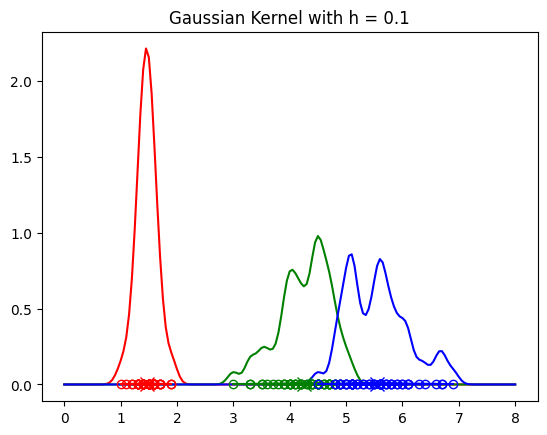

In [54]:
def plot_kernels_1d(df: object, label_name: str, feature: str, spread: float):
    """Plot kernels for one feature"""
    # Create an array from 0 to 8 in increments of 0.05
    ax = np.arange(0.00, 8.05, 0.05)
    
    setosa_df = df.loc[df[label_name] == "setosa"]
    setosa_df = setosa_df.loc[:, [feature]]
    setosa_arr = np.array(setosa_df)

    vers_df = df.loc[df[label_name] == "versicolor"]
    vers_df = vers_df.loc[:, [feature]]
    vers_arr = np.array(vers_df)

    virg_df = df.loc[df[label_name] == "virginica"]
    virg_df = virg_df.loc[:, [feature]]
    virg_arr = np.array(virg_df)

    p1 = []
    p2 = []
    p3 = []
    p1 = np.zeros((len(ax), 1))
    p2 = np.zeros((len(ax), 1))
    p3 = np.zeros((len(ax), 1))
    

    for i in range(len(ax)):
        test_example = np.reshape(ax[i], (1, 1))
        setosa = np.reshape(setosa_arr, (50, 1))
        vers = np.reshape(vers_arr, (50, 1))
        virg = np.reshape(virg_arr, (50, 1))

        s_kernels = parzen_window.gaussian_kernel(test_example, setosa, spread)
        vers_kernels = parzen_window.gaussian_kernel(test_example, vers, spread)
        virg_kernels = parzen_window.gaussian_kernel(test_example, virg, spread)
        p1[i] = (1/len(setosa_df)) * np.sum(s_kernels)
        p2[i] = (1/len(vers_df)) * np.sum(vers_kernels)
        p3[i] = (1/len(virg_df)) * np.sum(virg_kernels)
   
    plt.plot(ax.T, p1, 'r-')
    plt.plot(ax.T, p2, 'g-')
    plt.plot(ax.T, p3, 'b-')
    plt.plot(setosa_arr, np.zeros((50, 1)), "ro-", markerfacecolor='none')
    plt.plot(np.mean(setosa_arr), 0, "rx-", markersize=10)
    plt.plot(vers_arr, np.zeros((50, 1)), "go-", markerfacecolor='none')
    plt.plot(np.mean(vers_arr), 0, "gx-", markersize=10)
    plt.plot(virg_arr, np.zeros((50, 1)), "bo-", markerfacecolor='none')
    plt.plot(np.mean(virg_arr), 0, "bx-", markersize=10)
    plt.title(f"Gaussian Kernel with h = {spread}")
    plt.show()
    
plot_kernels_1d(df, "species", "petal_length", 0.1)

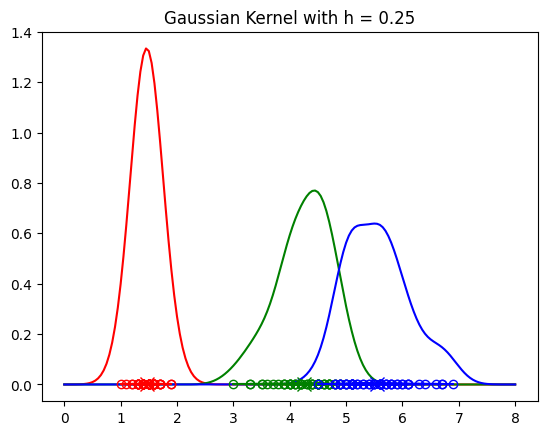

In [55]:
plot_kernels_1d(df, "species", "petal_length", 0.25)

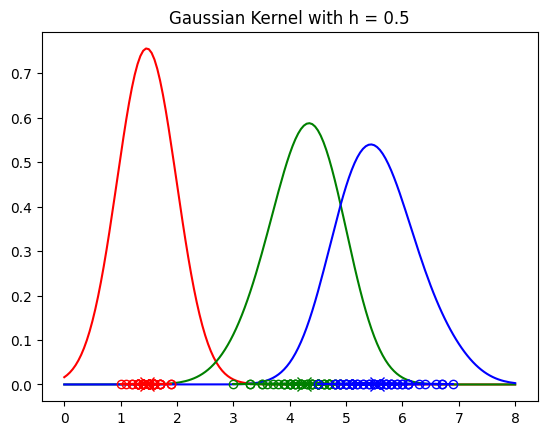

In [56]:
plot_kernels_1d(df, "species", "petal_length", 0.5)

### (c) [15 point] Using all observations, the petal length and the petal width from the Iris data replicate the subfigures in Figure 3 without contour lines.
![image](./data_files/images/Figure_6.jpg)

In [60]:
def plot_kernels_2d(df: object, label_name: str, spread):
    """Plot kernels with two features"""
    # Create arrays of length 101
    ax = np.arange(-1, 3.04, 0.04)
    ax = np.reshape(ax, (len(ax), 1))
    ay = np.arange(0.00, 7.07, 0.07)
    ay = np.reshape(ay, (len(ay), 1))
    
    # convert arrays to 101 X 101
    [Ax, Ay] = np.meshgrid(np.linspace(-1, 3, 101), np.linspace(0, 7, 101))
    
    # Flatten arrays to size 10201 X 1 and stack column-wise
    Ax = np.ndarray.flatten(Ax)
    Ay = np.ndarray.flatten(Ay)
    Axy = common.stack_columns(Ax, Ay)
    # Get the length of the new matrix to loop through every row
    lenAxy = len(Axy)
    
    new_df = df.drop([label_name], axis=1)
    data = np.array(new_df)
    data = np.fliplr(new_df)
    
    p1 = []
    p2 = []
    p3 = []
    p1 = np.zeros((lenAxy, 1))
    p2 = np.zeros((lenAxy, 1))
    p3 = np.zeros((lenAxy, 1))
    for i in range(lenAxy):
        test_example = np.reshape(Axy[i, :], (1, 2))
        s_kernels = parzen_window.gaussian_kernel(test_example, data[:50, :], spread)
        vers_kernels = parzen_window.gaussian_kernel(test_example, data[50:100, :], spread)
        virg_kernels = parzen_window.gaussian_kernel(test_example, data[100:, :], spread)
        p1[i] = (1/50) * np.sum(s_kernels)
        p2[i] = (1/50) * np.sum(vers_kernels)
        p3[i] = (1/50) * np.sum(virg_kernels)
    
    y_tmp = common.stack_columns(p1, p2)
    y_tmp = common.stack_columns(y_tmp, p3)
    y_tmp = y_tmp.T
    
    y_pred = np.array(list(y_tmp.argmax(axis=0)))
    indx1 = np.where(y_pred == 0)[0]
    indx2 = np.where(y_pred == 1)[0]
    indx3 = np.where(y_pred == 2)[0]

    plt.plot(Ax[indx1], Ay[indx1], '.', color='#F9DBDB', linewidth=6, markersize=20)
    plt.plot(Ax[indx2], Ay[indx2], '.', color='#DBF9DB', linewidth=6, markersize=20)
    plt.plot(Ax[indx3], Ay[indx3], '.', color='#DBDBF9', linewidth=6, markersize=20)
    plt.plot(data[:50, 0],data[:50, 1], "ro", linewidth=5, markersize=6, markerfacecolor='none')
    plt.plot(data[50:100, 0], data[50:100, 1], "go", linewidth=5, markersize=6, markerfacecolor='none')
    plt.plot(data[100:, 0], data[100:, 1], "bo", linewidth=5, markersize=6, markerfacecolor='none')
    plt.title(f"Parzen Windows with Gaussian Kernel with h = {spread}")
    plt.xlim([0.0, 3.0])
    plt.xlabel("Petal Width")
    plt.ylabel("Petal Length")
    plt.show()

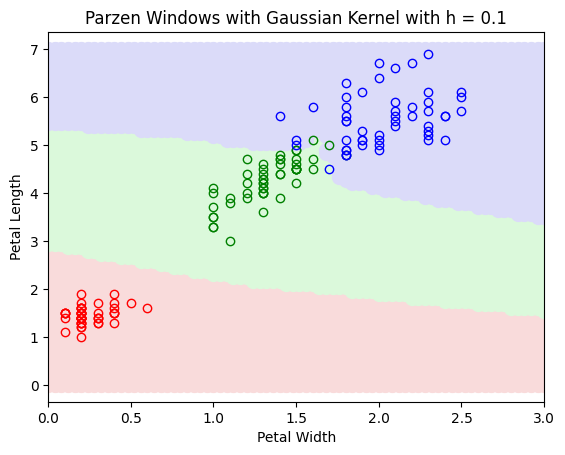

In [61]:
# drop the numerical labels
new_df = df.drop(["class_int"], axis=1)
plot_kernels_2d(new_df, "species", 0.1)

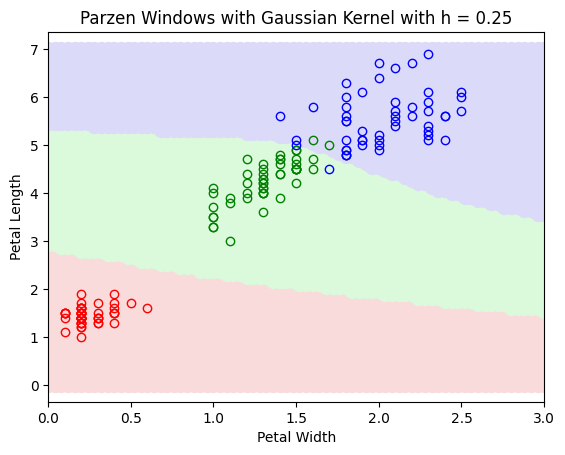

In [62]:
plot_kernels_2d(new_df, "species", 0.25)

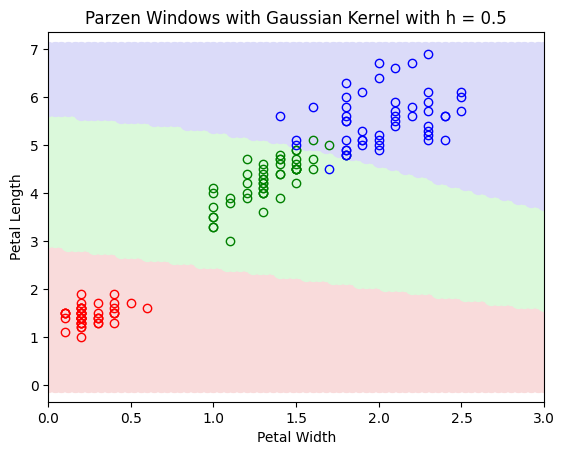

In [63]:
plot_kernels_2d(new_df, "species", 0.5)